In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

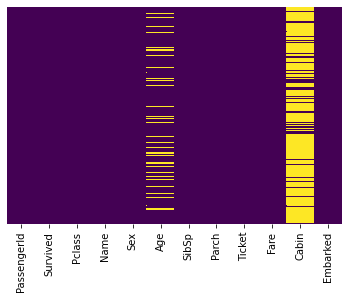

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Filtering out cabin which is missing
dummy=data[~(data["Cabin"].isnull())][["Pclass","Cabin","Survived"]]
dummy.to_csv('Cabin & Passenger effect on Survival.csv')

In [7]:
data["Cabin_v2"] = data["Cabin"].replace(to_replace = np.nan, value = 0)

In [8]:
data["Cabin_v2"] = data["Cabin_v2"].apply(lambda x: 0 if x==0 else 1)

In [ ]:
#Cabin_v2 is 0 when not present and 1 when cabin value is present

In [9]:
#rough
(data[data["Pclass"]==1]["Survived"].sum())/data[data["Pclass"]==1]["Survived"].count()

0.6296296296296297

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_v2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
embarked_dummies = pd.get_dummies(data['Embarked'],drop_first=True)

In [13]:
embarked_dummies.head()
#S = Southampton
# Q = Queenstown
#else Cherbourg

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [14]:
data_v2 = pd.concat([data,embarked_dummies],axis=1)

In [15]:
data_v2.rename(columns = {'Q':'Q_v1',"S":"S_v1"}, inplace = True)

In [16]:
data_v2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_v2,Q_v1,S_v1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [17]:
passenger_dummies = pd.get_dummies(data['Pclass'],drop_first=True)

In [79]:
data_v3 = pd.concat([data_v2,passenger_dummies],axis=1)

In [80]:
data_v3.rename(columns = {2:'Passeng_cl_2_v1',3:"Passeng_cl_3_v1"}, inplace = True)

In [81]:
data_v3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_v2,Q_v1,S_v1,Passeng_cl_2_v1,Passeng_cl_3_v1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


In [21]:
data_v3["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

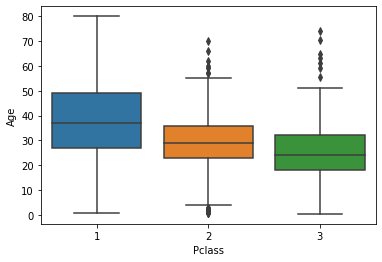

In [22]:
# Age treatment
sns.boxplot(x="Pclass", y="Age",data=data_v3)

In [23]:
def age_missing_complete (x):
    Age = x[0] 
    Pclass = x[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [82]:
data_v3["Age_v2"] = data_v3[["Age","Pclass"]].apply(age_missing_complete,axis=1)

<AxesSubplot:>

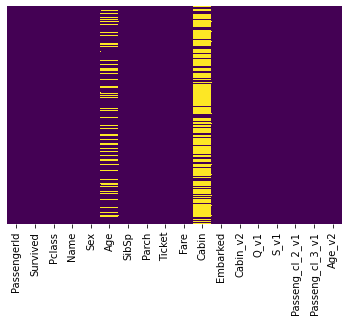

In [83]:
sns.heatmap(data_v3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [86]:
data_v3["Sex_v2"] = data_v3["Sex"].apply(lambda x: 1 if x=="male" else 0)

In [78]:
#Adding various additional feature (as we had underfitting in the features)

# data_v3["Fare per unit age"] = data_v3["Fare"]/data_v3["Age_v2"]
# data_v3["Age per unit Fare"] = data_v3["Age_v2"]/data_v3["Fare"]

# data_v3["Age_v2^2"] = data_v3["Age_v2"]**2
# data_v3["Age_v2^3"] = data_v3["Age_v2"]**3
# data_v3["Age_v2^4"] = data_v3["Age_v2"]**4
# data_v3["Age_v2^5"] = data_v3["Age_v2"]**5
# data_v3["Age_v2^6"] = data_v3["Age_v2"]**6
# data_v3["Age_v2^7"] = data_v3["Age_v2"]**7
# data_v3["Age_v2^8"] = data_v3["Age_v2"]**8

# data_v3["Fare^2"] = data_v3["Fare"]**2
# data_v3["Fare^3"] = data_v3["Fare"]**3
# data_v3["Fare^4"] = data_v3["Fare"]**4
# data_v3["Fare^5"] = data_v3["Fare"]**5
# data_v3["Fare^6"] = data_v3["Fare"]**6
# data_v3["Fare^7"] = data_v3["Fare"]**7
# data_v3["Fare^8"] = data_v3["Fare"]**8

#Adding these many features didnt improve the learning curve at all (rather it depreciated more) so removing these extra features

In [ ]:
#Feature Scaling


In [84]:
data_v3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_v2', 'Q_v1',
       'S_v1', 'Passeng_cl_2_v1', 'Passeng_cl_3_v1', 'Age_v2'],
      dtype='object')

In [87]:
X = data_v3[["Sex_v2","SibSp",'Passeng_cl_2_v1', 'Passeng_cl_3_v1','Fare','Age_v2',"Parch",'Q_v1', 'S_v1',"Cabin_v2"]]#"Cabin_v2","Age_check",'Q_v1', 'S_v1'
y = data_v3["Survived"]
#X = data_v3.drop(labels = ["Age per unit Fare",'Fare^4','Age_v2^4','Age_v2^5', 'Age_v2^6','Fare^5', 'Fare^6','Fare^7', 'Fare^8','Age_v2^7', 'Age_v2^8',"Cabin_v2","Survived","Embarked",'Cabin',"Ticket","Age",'Pclass', 'Name',"PassengerId","Sex"],axis=1)#"Cabin_v2","Age_check",'Q_v1', 'S_v1'
#y = data_v3["Survived"]


#Missclassification error about .2 without Age_v2 ()
#Missclassification error about .2 without SibSp
#Missclassification error about .3 without Sex_v2 (keep Sex_v2)
#Keeping 'Q_v1', 'S_v1' improves the misclassification error to .18   **achievement
#Keeping Cabin_v2 also improves the model to say .16 **achievement
#Keeping Age_check does not improves the model


In [88]:
#quick check of decision boundary
#1st doing feature scaling and normalization before pca (variance will be calculated appropriately)
#X.max()

Sex_v2               1.0000
SibSp                8.0000
Passeng_cl_2_v1      1.0000
Passeng_cl_3_v1      1.0000
Fare               512.3292
Age_v2              80.0000
Parch                6.0000
Q_v1                 1.0000
S_v1                 1.0000
Cabin_v2             1.0000
dtype: float64

In [90]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# scaled_data = scaler.transform(X)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(scaled_data)
# pca.explained_variance_ratio_.sum()     #43.52% (with 2 components)

0.40618789099073416

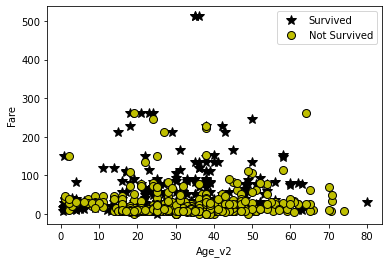

In [221]:
dummy = X[["Age_v2","Fare"]]                  # CHANGE Select 2 columns to show decision boundary
dummy_v2 = dummy.to_numpy()

fig = pyplot.figure()
pos = y == 1
neg = y == 0

# Plot Examples
pyplot.plot(dummy_v2[pos, 0], dummy_v2[pos, 1], 'k*', lw=2, ms=10)
pyplot.plot(dummy_v2[neg, 0], dummy_v2[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
pyplot.xlabel('Age_v2')                        # CHANGE Name of 1st column
pyplot.ylabel('Fare')                          # CHANGE Name of 2nd column
pyplot.legend(['Survived', 'Not Survived'])
pass

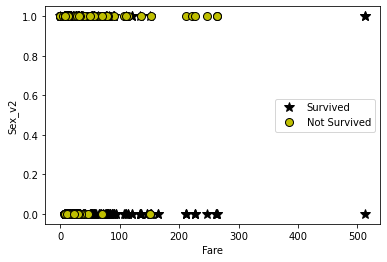

In [144]:
dummy = X[["Fare","Sex_v2"]]                  # CHANGE Select 2 columns to show decision boundary
dummy_v2 = dummy.to_numpy()

fig = pyplot.figure()
pos = y == 1
neg = y == 0

# Plot Examples
pyplot.plot(dummy_v2[pos, 0], dummy_v2[pos, 1], 'k*', lw=2, ms=10)
pyplot.plot(dummy_v2[neg, 0], dummy_v2[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
pyplot.xlabel('Fare')                        # CHANGE Name of 1st column
pyplot.ylabel('Sex_v2')                          # CHANGE Name of 2nd column
pyplot.legend(['Survived', 'Not Survived'])
pass

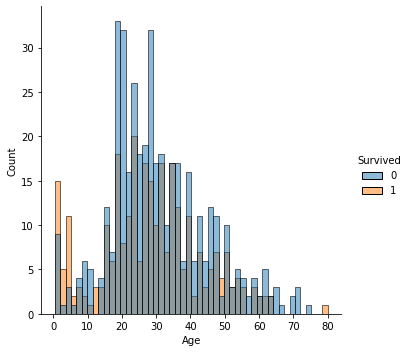

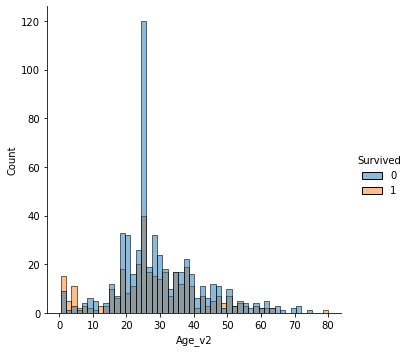

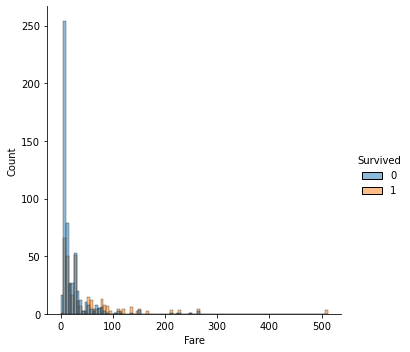

In [145]:
sns.displot(data_v3,x="Age",kde=False,bins=50,hue="Survived")
sns.displot(data_v3,x="Age_v2",kde=False,bins=50,hue="Survived")
sns.displot(data_v3,x="Fare",kde=False,bins=100,hue="Survived")

In [51]:
#Age mein 177 missing jisme se 25 ki entry 136 times hui hai
dummy = data_v3[data_v3["Age"] != data_v3["Age_v2"]]

In [52]:
dummy["Age_v2"].value_counts()

25.0    136
38.0     30
30.0     11
Name: Age_v2, dtype: int64

In [29]:
data_v3["Age_check"]=data_v3["Age"].apply(lambda x: 0 if pd.isnull(x) else 1)

In [ ]:
#list of one ways
from pandasql import sqldf 
mysql = lambda q: sqldf(q, globals())
query = '''
SELECT , sum(Survived) as survived,count(Survived) as count,100*sum(Survived)/count(Survived) as Survival_Rate
FROM data_v3
group by 1
'''
mysql(query).head()

In [96]:
mysql(query).to_csv("Age Survival stats.csv")

In [91]:
data_v3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_v2', 'Q_v1',
       'S_v1', 'Passeng_cl_2_v1', 'Passeng_cl_3_v1', 'Age_v2', 'Sex_v2'],
      dtype='object')

In [136]:
query = '''
SELECT Age_v2 , sum(Survived) as survived,count(Survived) as count,100*sum(Survived)/count(Survived) as Survival_Rate
FROM data_v3
group by 1;
'''
mysql(query).to_csv("SQL Summaries.csv",index=False)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=101)

In [93]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression( fit_intercept=True,max_iter=400,C = 10000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=10000, max_iter=400)

In [94]:
logmodel.score(X_train, y_train)

0.8250401284109149

In [95]:
from sklearn.model_selection import learning_curve

In [96]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(fit_intercept=True,max_iter=400,C = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [97]:
train_miss_Classification = 1- train_scores
test_miss_Classification = 1- test_scores

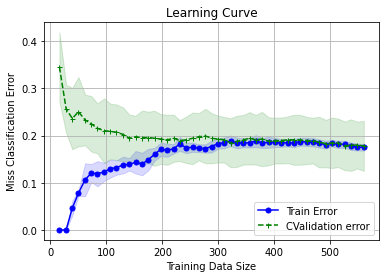

In [98]:
#1000
train_mean = np.mean(train_miss_Classification, axis=1)
train_std = np.std(train_miss_Classification, axis=1)
test_mean = np.mean(test_miss_Classification, axis=1)
test_std = np.std(test_miss_Classification, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Train Error')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='CValidation error')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Miss Classification Error')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [99]:
y_check=logmodel.predict(X_test)

In [100]:
#Logistic Final Prediction 
sum(y_check==y_test)/len(y_check)

0.7910447761194029

In [ ]:
#actual Test Data
################################3
##########################3
###############################33
3#############################
###########################

In [101]:
#modelling using complete X

logmodel.fit(X,y)

LogisticRegression(C=10000, max_iter=400)

In [102]:
data = pd.read_csv("test.csv")

In [103]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

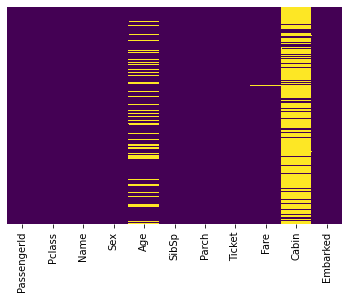

In [104]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [105]:
data["Cabin_v2"] = data["Cabin"].replace(to_replace = np.nan, value = 0)

In [106]:
data["Cabin_v2"] = data["Cabin_v2"].apply(lambda x: 0 if x==0 else 1)

In [107]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_v2
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [108]:
embarked_dummies = pd.get_dummies(data['Embarked'],drop_first=True)

In [109]:
embarked_dummies.head()
#S = Southampton
# Q = Queenstown
#else Cherbourg

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [110]:
data_v2 = pd.concat([data,embarked_dummies],axis=1)

In [111]:
data_v2.rename(columns = {'Q':'Q_v1',"S":"S_v1"}, inplace = True)

In [112]:
data_v2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_v2,Q_v1,S_v1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [113]:
passenger_dummies = pd.get_dummies(data['Pclass'],drop_first=True)

In [114]:
data_v3 = pd.concat([data_v2,passenger_dummies],axis=1)

In [115]:
data_v3.rename(columns = {2:'Passeng_cl_2_v1',3:"Passeng_cl_3_v1"}, inplace = True)

In [116]:
def age_missing_complete (x):
    Age = x[0] 
    Pclass = x[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [117]:
data_v3["Age_v2"] = data_v3[["Age","Pclass"]].apply(age_missing_complete,axis=1)

<AxesSubplot:>

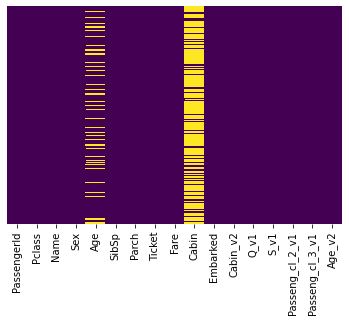

In [118]:
sns.heatmap(data_v3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [119]:
data_v3["Sex_v2"] = data_v3["Sex"].apply(lambda x: 1 if x=="male" else 0)

In [120]:
X_test = data_v3[["Sex_v2","SibSp",'Passeng_cl_2_v1', 'Passeng_cl_3_v1','Fare','Age_v2',"Parch",'Q_v1', 'S_v1',"Cabin_v2"]]#"Cabin_v2","Age_check",'Q_v1', 'S_v1'


In [123]:
#logmodel.predict(X_test)
#there was null values

In [124]:
X_test[]

SyntaxError: invalid syntax (<ipython-input-124-a914af5cb247>, line 1)

In [125]:
X_test["Fare"].fillna(X_test["Fare"].mean(),inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [126]:
y_predicted = logmodel.predict(X_test)

In [81]:
X_test

,Sex_v2,SibSp,Passeng_cl_2_v1,Passeng_cl_3_v1,Fare,Age_v2,Parch,Q_v1,S_v1,Cabin_v2
0,1,0,0,1,7.8292,34.5,0,1,0,0
1,0,1,0,1,7.0000,47.0,0,0,1,0
2,1,0,1,0,9.6875,62.0,0,1,0,0
3,1,0,0,1,8.6625,27.0,0,0,1,0
4,0,1,0,1,12.2875,22.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,1,0,0,1,8.0500,25.0,0,0,1,0
414,0,0,0,0,108.9000,39.0,0,0,0,1
415,1,0,0,1,7.2500,38.5,0,0,1,0
416,1,0,0,1,8.0500,25.0,0,0,1,0


In [82]:
data_v3

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_v2,Q_v1,S_v1,Passeng_cl_2_v1,Passeng_cl_3_v1,Age_v2,Sex_v2
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,34.5,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1,47.0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,1,0,62.0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,27.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,25.0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,0,0,39.0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,38.5,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0,1,0,1,25.0,1


In [127]:
X_test_v2 = pd.concat([X_test,data_v3["PassengerId"],pd.DataFrame(y_predicted)],axis=1)

In [128]:
X_test_v2[["PassengerId",0]].to_csv("Logistic Submission.csv")